In [3]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from helpers.cm26 import DatasetCM26, read_datasets
from helpers.selectors import select_NA, select_Pacific, select_Cem, select_globe, compare, plot
from helpers.operators import Coarsen, Filtering, Subsampling, CoarsenKochkov, CoarsenWeighted, CoarsenKochkovMinMax
from helpers.ann_tools import import_ANN

import hvplot.xarray
import hvplot
import cmocean

%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
subfilter = read_datasets(['validate'], [4], 'subfilter', 3)['validate-4']
subgrid = read_datasets(['validate'], [4], 'subgrid', 3)['validate-4']

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-4
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subgrid/FGR3/factor-4


Correlation: 0.9251535662300685
Relative Error: 0.33348768949508667
R2 =  0.8460897207260132
R2 max =  0.8559383600950241
Optinal scaling: 1.1201560497283936
Nans [test/control]: [0, 0]


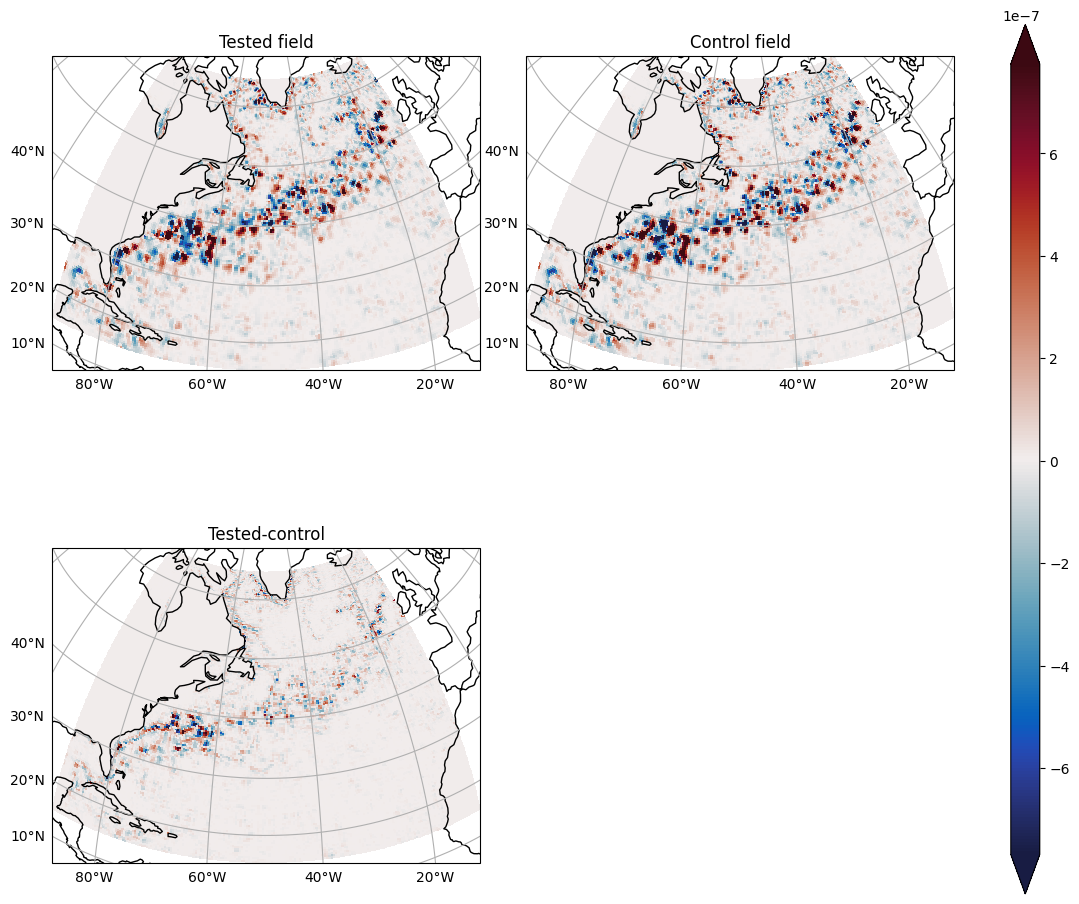

In [30]:
compare(subfilter.data.SGSx.isel(zl=0),subgrid.data.SGSx.isel(zl=0))

In [68]:
%time ds0 = subfilter.select2d(compute=lambda x: x.compute())
%time state = ds0.state
%time state.compute_features();

CPU times: user 22.8 ms, sys: 5.65 ms, total: 28.4 ms
Wall time: 350 ms
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.25 µs
CPU times: user 397 ms, sys: 8.99 ms, total: 406 ms
Wall time: 122 ms


In [70]:
from helpers.train_ann import train_ANN

In [84]:
train_ANN([15], load=True)

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-15
Factor: 15, depth: 0, MSE train/validate/waves: [1.590259, 1.311964, 0.000000]
Iter/num_iters [1/10]. Iter time/Remaining time in seconds: [0.17/1.5]
Factor: 15, depth: 0, MSE train/validate/waves: [1.503607, 1.358481, 0.000000]
Iter/num_iters [2/10]. Iter time/Remaining time in seconds: [0.15/1.3]
Factor: 15, depth: 0, MSE train/validate/waves: [1.478002, 1.390682, 0.000000]
Iter/num_iters [3/10]. Iter time/Remaining time in seconds: [0.14/1.1]
Factor: 15, depth: 0, MSE train/validate/waves: [1.303320, 1.221061, 0.000000]
Iter/num_iters [4/10]. Iter time/Remaining time in seconds: [0.14/0.9]
Factor: 15, depth: 0, MSE train/validate/waves: [1.458402, 1.316121, 0.000000]
Iter/num_iters [5/10]. Iter time/Remaining time in seconds: [0.15/0.7]
Factor: 15, depth: 0, MSE train/validate/waves: [1.214522, 1.188263, 0.000

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:          (factor: 1, depth: 1, iter: 10)
 Coordinates:
   * factor           (factor) int64 15
   * depth            (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train        (iter, factor, depth) float64 1.59 1.504 ... 1.697 1.327
     MSE_plain_waves  (iter, factor, depth) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
     MSE_validate     (iter, factor, depth) float64 1.312 1.358 ... 1.559 1.309)

In [79]:
train_ANN([4,9,12,15], load=True)

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-4
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-4
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-9
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-9
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-15
Factor: 4, depth: 0, MSE train/validate/waves: [22.376001, 21.805706, 0.000000]
Factor: 9, depth: 0, MSE train/validate/waves: [3.594382, 6.584430, 0.000000]
Factor: 12, depth: 0, MSE train/validate/waves: [2.793254, 2.477695, 0.000000]
Factor: 15, depth: 0, MSE train/validate/waves: [3.864875, 1.73

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:          (factor: 4, depth: 1, iter: 10)
 Coordinates:
   * factor           (factor) int64 4 9 12 15
   * depth            (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train        (iter, factor, depth) float64 22.38 3.594 ... 1.636 1.544
     MSE_plain_waves  (iter, factor, depth) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
     MSE_validate     (iter, factor, depth) float64 21.81 6.584 ... 1.542 1.736)

In [82]:
train_ANN([4,9,12,15], load=True, short_waves_dissipation=True)

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-4
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-4
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-9
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-9
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-15
Factor: 4, depth: 0, MSE train/validate/waves: [23.779209, 21.082384, 2.451413]
Factor: 9, depth: 0, MSE train/validate/waves: [3.595008, 4.003868, 2.083706]
Factor: 12, depth: 0, MSE train/validate/waves: [4.197958, 3.464237, 3.301279]
Factor: 15, depth: 0, MSE train/validate/waves: [1.737746, 3.54

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:          (factor: 4, depth: 1, iter: 10)
 Coordinates:
   * factor           (factor) int64 4 9 12 15
   * depth            (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train        (iter, factor, depth) float64 23.78 3.595 ... 1.86 1.895
     MSE_plain_waves  (iter, factor, depth) float64 2.451 2.084 ... 1.064 1.671
     MSE_validate     (iter, factor, depth) float64 21.08 4.004 ... 2.125 2.083)